In [6]:
%%capture
!pip install ht pandas fluids Coolprop

In [2]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import markers,lines,colors
from scipy import interpolate
import ht,fluids
import CoolProp as cp
import pandas as pd
from IPython.display import  Latex

Considere un intercambiador de calor de tubo en tubo, de flujo paralelo, con los siguientes parámetros:

    Corriente fría:
        Temperatura de entrada: TFE=40°C
        Capacidad térmica del flujo: CF=20000W/K

    Corriente caliente:
        Temperatura de entrada: TCE=150°C
        Capacidad térmica de flujo: CC=10000W/K

    Superficie de intercambio: 30m2

    Coeficiente global de transmisión: 500W/m2 K

Se pide determinar:

1.- El calor intercambiado

2.- La temperatura de la corriente fría a la salida

3.- La temperatura de la corriente caliente a la salida


Un nuevo requerimiento de proceso exige que la temperatura caliente de salida sea de 90°C. Utilizando un equipo similar, se pide:

4.- La nueva superficie de intercambio que cumpla el requerimiento, si se utilizara una configuración en flujo paralelo, y otra en contracorriente.

5.- El nuevo calor intercambiado.

6.- La nueva temperatura de la corriente fría de salida.



In [2]:
Tfe = 40
Cf = 20000
Tce = 150
Cc = 10000
A = 30
U = 500
#flujo paralelo

In [3]:
Cmin, Cmax = [np.min((Cc,Cf)),np.max((Cc,Cf))]
Cr = Cmin/Cmax
Nut = Cmin/U/A
epsilon = ht.effectiveness_from_NTU(Nut, Cr, subtype='parallel')
Qmax = Cmin * (Tce-Tfe)
Q = Qmax*epsilon
display(Latex(f'\(\dot Q=\){Q*1e-3:.2f}kW'))
display(Latex(f'\(\\varepsilon =\){epsilon:.2f}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [4]:
Tfs = Tfe+Q/Cf
display(Latex(f'\(T_{{fs}} =\){Tfs:.1f}\(^\circ\)C'))

Tcs = Tce-Q/Cc
display(Latex(f'\(T_{{cs}} =\){Tcs:.1f}\(^\circ\)C'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [5]:
Tcs = 90
#mismo equipo

Q = (Tce-Tcs)*Cc
display(Latex(f'\(\dot Q=\){Q*1e-3:.2f}kW'))

epsilon = Q/Qmax
display(Latex(f'\(\\varepsilon =\){epsilon:.2f}'))
Nut_p = ht.NTU_from_effectiveness(epsilon,Cr,subtype='parallel')
Nut_c = ht.NTU_from_effectiveness(epsilon,Cr,subtype='counterflow')
display(Latex(f'\(Nut_p =\){Nut_p:.2f}'))
display(Latex(f'\(Nut_c =\){Nut_c:.2f}'))

A_p = Cmin/U/Nut_p
A_c = Cmin/U/Nut_c


display(Latex(f'\(A_p =\){A_p:.2f}m\(^2\)'))
display(Latex(f'\(A_c =\){A_c:.2f}m\(^2\)'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [6]:
Tfs = Tfe+Q/Cf
display(Latex(f'\(T_{{fs}} =\){Tfs:.1f}\(^\circ\)C'))

<IPython.core.display.Latex object>

	
A un haz de tubos horizontales está formado por un patrón en cuadrado de 5 tubos en altura y 5 tubos a lo ancho. Los tubos de acero al carbono (\(k_w\) =50W/m K) son de diámetro externo $D=$25mm, con un espesor de pared e \(t =1\)mm. Estos se encuentran sumergidos en una corriente de vapor saturado a \(T_{sat} =350\)K. Por uno de sus extremos ingresa agua a \(T_{AE}=300\)K, para un caudal que en el interior de estos se establece una velocidad de \(V=2\)m/s (un paso por tubos). Si se requiere que la temperatura del agua a la salida sea
\(T_{AS}=320\)K, se pide calcular:

    a. El caudal de agua establecido (\(\dot m_f\) ).
    b. El calor intercambiado (\(\dot Q\)).
    c. La masa de vapor condensado (\(\dot m_c\) )
    d. El coeficiente global de transmisión (\(U\)).
    e. La superficie de intercambio requerida (\(A\)).
Durante el funcionamiento, repentinamente la temperatura del agua cae a \(T_{AE}'= 295\)K. Asumiendo que todos los parámetros calculados (\(U, A, \dot m_f\) , y todas las propiedades de los fluidos) permanecen constantes,
 determinar:
 
    f. La nueva temperatura del agua a la salida (\(T_{AS}'\))
    g. El nuevo calor intercambiado (\(\dot Q'\)).
    h. La nueva tasa de condensado (\(\dot m_c'\) ).

CONSIDERACIONES:

    - Para el cálculo de las propiedades térmicas del lado vapor, y del $h_e$, considerar que la temperatura de pared exterior $T_{we}$=330K.

    -Para corrección del coeficiente de convección interno, utilizar 
$$\mu_{wi}=4.31 \cdot 10^{-4}\text{kg/m s}$$
    - Para a el cálculo del coeficiente de convección interno se sugiere utilizar expresiones de la forma 
$$Nu = C Re^\alpha PR^\beta$$.


In [11]:
De=25e-3
e_t=1e-3
T_sat = 350
Tsat = T_sat
T_ae = 300
V_a = 2
T_as = 320
Nx, Ny = [5,5]
g =9.8
k_t = 50

In [20]:
Di = De-2*e_t
Ai = np.pi*Di**2/4



T_am = (T_ae+T_as)/2
p_a = 101.3e3
Cp_a = cp.CoolProp.PropsSI('C','T',T_am,'P',p_a,'Water')
rho_a = cp.CoolProp.PropsSI('D','T',T_am,'P',p_a,'Water')
mu_a = cp.CoolProp.PropsSI('V','T',T_am,'P',p_a,'Water')
nu_a = mu_a/rho_a
k_a = cp.CoolProp.PropsSI('L','T',T_am,'P',p_a,'Water')

Cp_v = cp.CoolProp.PropsSI('C','T',T_sat,'Q',1,'Water')
rho_v = cp.CoolProp.PropsSI('D','T',T_sat,'Q',1,'Water')
mu_v = cp.CoolProp.PropsSI('V','T',T_sat,'Q',1,'Water')
nu_v = mu_v/rho_v
i_v = cp.CoolProp.PropsSI('H','T',T_sat,'Q',1,'Water')
i_va = cp.CoolProp.PropsSI('H','T',T_sat,'Q',0,'Water')
Pr_v = cp.CoolProp.PropsSI('Prandtl','T',T_sat,'Q',1,'Water')
Pr_a = cp.CoolProp.PropsSI('Prandtl','T',T_sat,'Q',0,'Water')
hfg = i_v-i_va

hfg_1 = hfg+(0.683-0.228/Pr_v)*Cp_v*(T_sat-T_ae)

G_a = Nx*Ny*Ai*V_a
m_a = rho_a*G_a
Q_a = m_a*Cp_a*(T_as-T_ae)

Q_v = Q_a

m_c = Q_v/(hfg_1)

display(Latex(f'$\dot m_a = {m_a:.2f}kg/s$'))
display(Latex(f'$Q_a = {Q_a*1e-3:.2f}$kW'))
display(Latex(f'$\dot m_c = {m_c:.2f}kg/s$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [21]:
h_e = 0.728*(((rho_a-rho_v)*g*hfg_1*k_a**3)/(Ny*nu_a*De*(T_sat-T_ae)))**(1/4)
display(Latex(f'$h_e= {h_e:.0f}W/m^2 K$'))

<IPython.core.display.Latex object>

In [14]:
Re_a = V_a/nu_a * Di
display(Latex(f'$Re_a= {Re_a:.2f}$'))

Nu_ia = ht.conv_internal.Nu_conv_internal(Re_a,Pr_a)
h_ia = Nu_ia*k_a/Di
display(Latex(f'$h_i= {h_ia:.0f}W/m^2 K$'))

#h_ia = 8726

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [15]:
U = 1 / (1/h_e+ De*np.log(De/Di)/2/k_t+De/(h_ia*Di) ) 

In [16]:
DTLM = ht.LMTD(Tci=T_ae, Tco=T_as, Thi=T_sat, Tho=T_sat)
display(Latex(f'DTLM$= {DTLM:.1f}$'))
Area = Q_a / U / DTLM
display(Latex(f'Area$= {Area:.1f}m^2$'))

Nut = U * Area / (m_a*Cp_a)
display(Latex(f'NUT$= {Nut:.2f}$'))

epsilon = ht.effectiveness_from_NTU(Nut, 0, subtype='counterflow')

display(Latex(f'$\\varepsilon$= {epsilon:.2f}$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [17]:
T_ae2 = 295

$$Q = \varepsilon Q_{\max}$$
$$Q = \varepsilon C_{\min}(T_{sat}-T_{ae}) = C_a(T_{as}-T_{ae})$$
$$\varepsilon C_a(T_{sat}-T_{ae}) = C_a(T_{as}-T_{ae})$$
$$\varepsilon (T_{sat}-T_{ae}) = (T_{as}-T_{ae})$$
$$T_{as} = \varepsilon (T_{sat}-T_{ae})+T_{ae}$$


In [18]:
T_as2 = epsilon*(T_sat-T_ae2)+T_ae2
display(Latex(f'$T_{{as}}^\\prime={T_as2:.2f}K$'))

<IPython.core.display.Latex object>

In [19]:
Q2 = Cp_a*m_a*(T_as2-T_ae2)
m_c2 = Q2/hfg_1
display(Latex(f'$Q_a^\\prime = {Q2*1e-3:.2f}$kW'))
display(Latex(f'$\dot m_c^\\prime = {m_c2:.2f}kg/s$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [3]:
m_g = 15
T_ge = 1100
m_a = 10
T_ae = 300
U = 100
Cp_a,Cp_g = [1075,1075]

In [36]:
T_as = 850

Q = m_a*Cp_a*(T_as-T_ae)


display(Latex(f'$Q={Q*1e-3:.1f}$kW'))
Cmax = Cp_g * m_g
Cmin = Cp_a * m_a
T_gs = T_ge - Q/Cmax
Qmax = Cmin*(T_ge-T_ae)
epsilon = Q/Qmax
display(Latex(f'$\\varepsilon={epsilon:.2f}$'))
Cr = Cmin/Cmax
Nut = ht.NTU_from_effectiveness(epsilon,Cr,subtype='crossflow');
#Nut  = UA / Cmin
A = Nut*Cmin/U
display(Latex(f'Área={A:.2f}m$^2$'))
Qmax

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

8600000

In [35]:
Nut

1.9679918749981342

In [5]:
def deltaTx(x,Tc0,Tf0,UA,L,Cc,Cf):
    return (Tc0-Tf0)*np.exp(-UA*(1/Cc-1/Cf)*x/L)

UA = U*A
Cc = Cmax
Cf = Cmin
L = 1
xi = np.linspace(0,1,100)
Tcx = np.copy(xi)
Tcx[0] = T_ge
for i, xii in enumerate(xi[:-1]):
    Tcx[i + 1] = T_as - deltaTx(xii, T_ge, T_as, UA, L, Cmax, Cmin)
Tcx[-1] = T_gs
Tfx = np.copy(xi)
Tfx[0] = T_ae
for i, xii in enumerate(xi[:-1]):
    Tfx[i + 1] = T_ge - deltaTx(xii, T_ge, T_as, UA, L, Cmin, Cmax)
Tfx[-1] = T_as

In [6]:
deltaTx(1, T_ge, T_as, UA, 1, Cmin, Cmax)

1.2973107139432503e+02

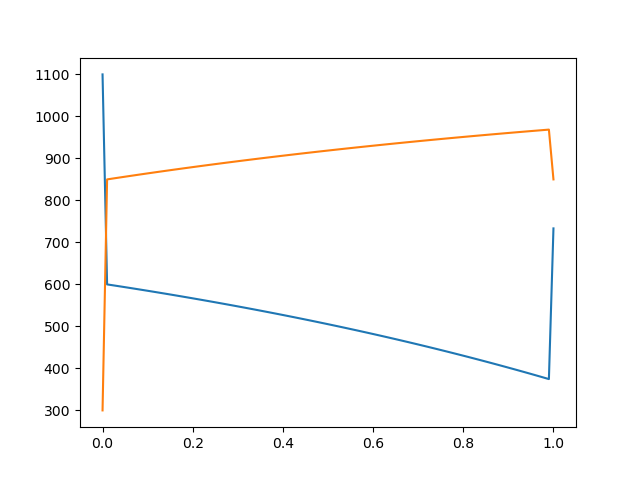

In [7]:
fig,ax = plt.subplots()
ax.plot(xi,Tcx)
ax.plot(xi,Tfx)

In [32]:
m_g2 = 13
Cmax2 = m_g2*Cp_g
Cr2 = Cmin/Cmax2
epsilon2 = ht.effectiveness_from_NTU(Nut,Cr2, subtype='crossflow')

Q2 = epsilon2*Qmax
display(Latex(f'$Q^\prime={Q2*1e-3:.0f}$ kW'))

<IPython.core.display.Latex object>

In [22]:
T_gs

733.3333333333333

In [33]:
T_gs2 = T_ge-Q2/Cmax2
display(Latex(f'$T_gs={T_gs2:.1f}$'))

<IPython.core.display.Latex object>

In [37]:
epsilon2

0.6631901443467195

In [40]:
T_as2 = T_ae+Q2/Cmin
T_as2

830.5521154773757